This is from a dataset I found on Kaggle about lung cancer and I am doing a prediction models on.

[https://www.kaggle.com/datasets/shantanugarg274/lung-cancer-prediction-dataset?resource=download]

#Introduction

This notebook demonstrates a complete pipeline for lung cancer prediction using the provided Lung Cancer Dataset. We will perform an Exploratory Data Analysis (EDA) to understand the data, followed by building and evaluating several classification models (Random Forest, SVM, XGBoost, and a Neural Network) to predict the presence of lung cancer (denoted by the PULMONARY_DISEASE variable). Finally, we compare model performances and discuss insights, including a comparison between deep learning and classical machine learning approaches for this problem.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, roc_auc_score, r2_score, mean_squared_error

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

#Exploratory Data Analysis


In [15]:
# Load the dataset, print
df = pd.read_csv("Lung Cancer Dataset.csv")
print("Shape of dataset:", df.shape)
print("Columns:", df.columns.tolist())
df.head(5)

Shape of dataset: (5000, 18)
Columns: ['AGE', 'GENDER', 'SMOKING', 'FINGER_DISCOLORATION', 'MENTAL_STRESS', 'EXPOSURE_TO_POLLUTION', 'LONG_TERM_ILLNESS', 'ENERGY_LEVEL', 'IMMUNE_WEAKNESS', 'BREATHING_ISSUE', 'ALCOHOL_CONSUMPTION', 'THROAT_DISCOMFORT', 'OXYGEN_SATURATION', 'CHEST_TIGHTNESS', 'FAMILY_HISTORY', 'SMOKING_FAMILY_HISTORY', 'STRESS_IMMUNE', 'PULMONARY_DISEASE']


,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES


In [4]:
# Check for missing values
print(df.isnull().sum())

# Target variable distribution
print("\nPULMONARY_DISEASE value counts:")
print(df["PULMONARY_DISEASE"].value_counts())

AGE                       0
GENDER                    0
SMOKING                   0
FINGER_DISCOLORATION      0
MENTAL_STRESS             0
EXPOSURE_TO_POLLUTION     0
LONG_TERM_ILLNESS         0
ENERGY_LEVEL              0
IMMUNE_WEAKNESS           0
BREATHING_ISSUE           0
ALCOHOL_CONSUMPTION       0
THROAT_DISCOMFORT         0
OXYGEN_SATURATION         0
CHEST_TIGHTNESS           0
FAMILY_HISTORY            0
SMOKING_FAMILY_HISTORY    0
STRESS_IMMUNE             0
PULMONARY_DISEASE         0
dtype: int64

PULMONARY_DISEASE value counts:
PULMONARY_DISEASE
NO     2963
YES    2037
Name: count, dtype: int64


There is no nan values. The output indicates no missing values in any column. The target distribution shows about 2037 "YES" cases and 2963 "NO" cases, meaning approximately 40.7% of the patients have a pulmonary disease and 59.3% do not. Thus, the classes are somewhat imbalanced but not severely.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,5000.0,57.222800,15.799224,30.000000,44.000000,57.000000,71.000000,84.000000
GENDER,5000.0,0.501200,0.500049,0.000000,0.000000,1.000000,1.000000,1.000000
SMOKING,5000.0,0.666400,0.471546,0.000000,0.000000,1.000000,1.000000,1.000000
FINGER_DISCOLORATION,5000.0,0.601200,0.489700,0.000000,0.000000,1.000000,1.000000,1.000000
MENTAL_STRESS,5000.0,0.539800,0.498463,0.000000,0.000000,1.000000,1.000000,1.000000
EXPOSURE_TO_POLLUTION,5000.0,0.516000,0.499794,0.000000,0.000000,1.000000,1.000000,1.000000
LONG_TERM_ILLNESS,5000.0,0.439200,0.496339,0.000000,0.000000,0.000000,1.000000,1.000000
ENERGY_LEVEL,5000.0,55.032043,7.913083,23.258308,49.440685,55.050421,60.323320,83.046971
IMMUNE_WEAKNESS,5000.0,0.394800,0.488857,0.000000,0.000000,0.000000,1.000000,1.000000
BREATHING_ISSUE,5000.0,0.800400,0.399740,0.000000,1.000000,1.000000,1.000000,1.000000


From the summary, the average age is about 57 years (min 30, max 84). About 50% of the patients are male (GENDER median 1.0) and 66.6% are smokers (SMOKING mean 0.667).

 We also observe a high prevalence of certain symptoms in this dataset: for example, 80% of individuals have breathing issues and 70% report throat discomfort. This suggests the dataset may largely consist of people with respiratory symptoms. However, not all symptomatic individuals have the disease, as only 40% are diagnosed with pulmonary disease.

In [6]:
# Compare pulmonary disease incidence among smokers vs non-smokers
smoker_ct = pd.crosstab(df["SMOKING"], df["PULMONARY_DISEASE"], normalize="index")
print(smoker_ct)

PULMONARY_DISEASE        NO       YES
SMOKING                              
0                  0.913070  0.086930
1                  0.432173  0.567827


<ipython-input-16-cc3cd1b21df2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PULMONARY_DISEASE', data=data, palette="autumn")


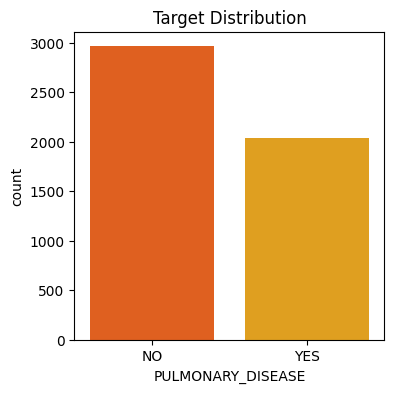

In [16]:

plt.figure(figsize=(4,4))
sns.countplot(x='PULMONARY_DISEASE', data=data, palette="autumn")
plt.title("Target Distribution")
plt.show()

The crosstab reveals a stark difference: among smokers, about 56.8% have pulmonary disease, whereas among non-smokers, only about 8.7% have the disease. This indicates smoking is a strong risk factor. Similarly, having a family history of smoking is associated with higher disease incidence (about 70% vs 33% if no family smoking history). In contrast, features like AGE and GENDER show little to no difference between the disease groups – the average age of patients with and without disease is almost the same (about 57 years), and both males and females have roughly equal disease rates (around 41%). This suggests that in this dataset, lifestyle factors and symptoms (like smoking, throat discomfort, breathing issues) are more indicative of pulmonary disease than basic demographics (age, sex).

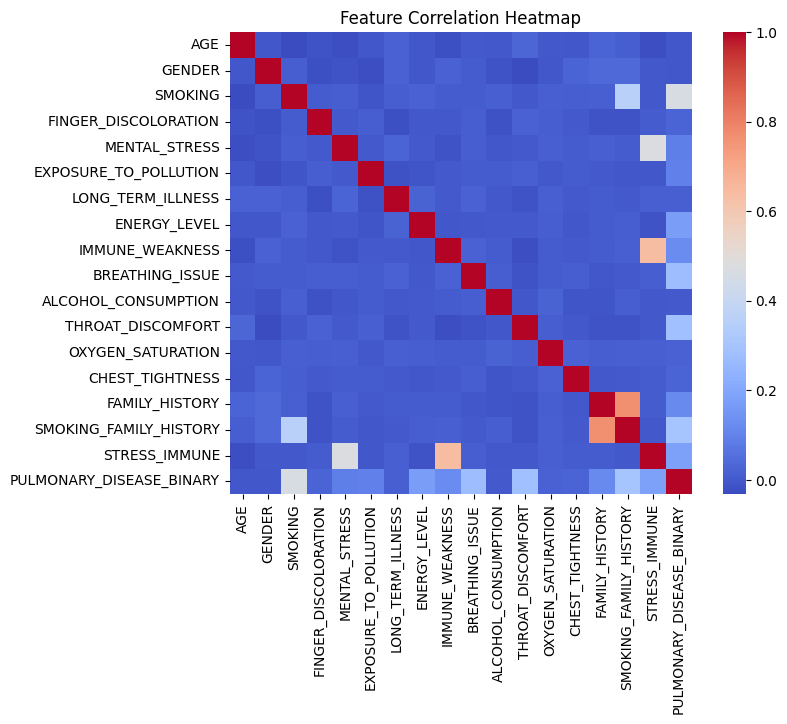

In [18]:
df['PULMONARY_DISEASE_BINARY'] = df['PULMONARY_DISEASE'].map({'NO':0, 'YES':1})
# Compute correlation matrix
corr = df.drop('PULMONARY_DISEASE', axis=1).corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap='coolwarm', square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

Some observations from the correlation matrix:

The target (PULMONARY_DISEASE_BINARY, bottom row) is most positively correlated with SMOKING (~ 0.46), followed by SMOKING_FAMILY_HISTORY (~ 0.30),
THROAT_DISCOMFORT (~ 0.28), and BREATHING_ISSUE (~ 0.27). This suggests these factors are strong indicators of lung disease presence.

Many features are only weakly correlated with each other (most off-diagonal entries are blue, near 0). One notable exception is a high correlation between FAMILY_HISTORY and SMOKING_FAMILY_HISTORY (~0.77), which makes sense: having a family history of lung disease is strongly associated with having family members who smoked.

SMOKING and SMOKING_FAMILY_HISTORY show a moderate correlation (~0.36), indicating smokers often have smoking in their family background as well.
Interestingly, Age and Gender have near-zero correlation with the disease (age correlation ~ -0.006, gender ~0.002 not listed but essentially 0). This implies in this dataset, lung cancer cases are not biased by age or gender – likely because smoking and other factors dominate risk. (In reality, smoking history is the leading cause of lung cancer, accounting for ~85% of case, overshadowing demographic factors.)

In [7]:
df_enc = df.copy()
df_enc["PULMONARY_DISEASE_BINARY"] = df_enc["PULMONARY_DISEASE"].map({"YES": 1, "NO": 0})
corr_target = df_enc.corr(numeric_only=True)["PULMONARY_DISEASE_BINARY"].drop("PULMONARY_DISEASE_BINARY")
# Get top 5 features by absolute correlation
top5_corr = corr_target.abs().sort_values(ascending=False).head(5)
print("Top 5 correlated features with Pulmonary Disease:")
print(top5_corr)

Top 5 correlated features with Pulmonary Disease:
SMOKING                   0.461467
SMOKING_FAMILY_HISTORY    0.302478
THROAT_DISCOMFORT         0.283545
BREATHING_ISSUE           0.270464
STRESS_IMMUNE             0.181053
Name: PULMONARY_DISEASE_BINARY, dtype: float64


After encoding, we identify the top 5 features most correlated with the target (by absolute Pearson correlation).
They are:

SMOKING – Highest correlation (about 0.46) with pulmonary disease. (Smokers are far more likely to have the disease, as noted above.)
SMOKING_FAMILY_HISTORY – Correlation about 0.30. (Having a family history of smoking elevates risk, possibly due to second-hand smoke or genetic predisposition.)

THROAT_DISCOMFORT – Correlation about 0.28. (Persistent throat discomfort is a symptom strongly associated with the disease.)

BREATHING_ISSUE – Correlation about 0.27. (Breathing difficulties are common in those with lung ailments.)

STRESS_IMMUNE – Correlation about 0.18. (This feature indicates stress-related immune weakness, which appears moderately associated with disease.)

For completeness, the next highest factors were ENERGY_LEVEL (about 0.17) and IMMUNE_WEAKNESS (about 0.12), but their correlations are substantially lower. Notably, AGE and GENDER have near-zero correlation with the target (-0.006 and -0.004 respectively), confirming they are not predictive in this dataset. Also, symptoms like chest tightness and finger discoloration, despite being present in many patients, show very low direct correlation (about 0.02) with the outcome – likely because they are common in both sick and non-sick groups.


                   SMOKING  SMOKING_FAMILY_HISTORY  THROAT_DISCOMFORT  \
PULMONARY_DISEASE                                                       
NO                    48.6                    10.3               59.0   
YES                   92.9                    35.1               85.5   

                   BREATHING_ISSUE  
PULMONARY_DISEASE                   
NO                            71.1  
YES                           93.1  


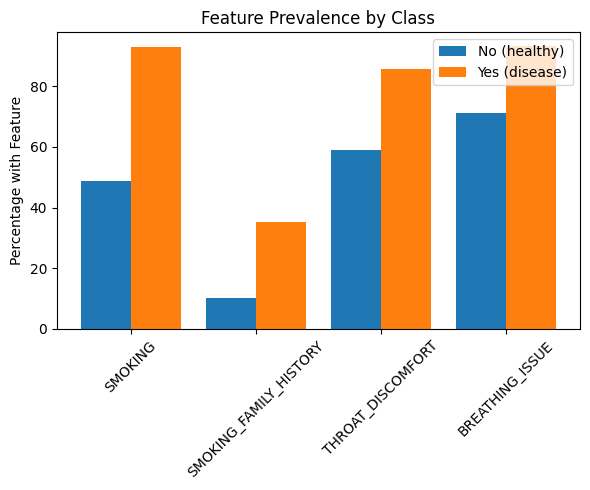

In [19]:
features_to_compare = ['SMOKING','SMOKING_FAMILY_HISTORY','THROAT_DISCOMFORT','BREATHING_ISSUE']
group_means = df.groupby('PULMONARY_DISEASE')[features_to_compare].mean()*100
print(group_means.round(1))
# Plot a grouped bar chart for visualization
yes_means = group_means.loc['YES']; no_means = group_means.loc['NO']
x = range(len(features_to_compare))
plt.figure(figsize=(6,5))
plt.bar([i-0.2 for i in x], no_means, width=0.4, label='No (healthy)')
plt.bar([i+0.2 for i in x], yes_means, width=0.4, label='Yes (disease)')
plt.xticks(x, features_to_compare, rotation=45)
plt.ylabel('Percentage with Feature')
plt.title('Feature Prevalence by Class')
plt.legend()
plt.tight_layout()
plt.show()

The printed percentages and the chart above highlight stark differences between the two groups:

Smoking: Only about 48.6% of the healthy group are smokers, whereas a whopping 92.9% of the diseased group are smokers. This aligns with well-known medical data that smoking is the primary risk factor for lung cancer


Smoking Family History (having family members who smoke): ~10.3% in healthy vs 35.1% in diseased. This suggests secondhand smoke or shared lifestyle can contribute to risk.

Throat Discomfort: ~59.0% of healthy individuals report throat discomfort vs 85.5% of those with lung disease. Breathing issues show a similar jump (71.1% vs 93.1%). These symptoms are much more common among patients, which is intuitive since lung cancer often causes respiratory symptoms (persistent cough, shortness of breath, etc.)


Other features (not all shown in the chart) also show differences: e.g., Exposure to pollution (about 57% in cases vs 47% in controls) and family history of lung disease (36.7% vs 25.7%) are higher in the diseased group, though the gaps are smaller. Alcohol consumption was nearly the same in both groups (~35%), indicating it may not have a significant direct effect here.
Gender difference is negligible in this dataset (50% vs 50.5% male in no vs yes groups), reflecting that both men and women are affected when risk factors are present.

##Key Insights from EDA:
Lung cancer occurrences in this data are strongly tied to known risk factors like smoking and related variables. Smokers (and those with smoking in the family) form the vast majority of the cancer group, underscoring smoking's impact. Additionally, symptomatic features (breathing issues, throat discomfort) are much more prevalent in those diagnosed, which is expected since these symptoms often result from lung damage. Conversely, features like age, gender, and alcohol use appear to have little distinction between the groups, suggesting they are not primary drivers in this dataset. Overall, the EDA aligns with medical understanding: tobacco exposure and respiratory symptoms are the clearest differentiators between those with and without lung cancer in this population.